<a href="https://colab.research.google.com/github/lauramazzu/Projects_laura/blob/main/day_78_regression_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
df.shape

(5391, 6)

In [4]:
df.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [5]:
#NaN values?
df.isna().values.any()

False

In [6]:
#Duplicate values?
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(0, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [8]:
df.USD_Domestic_Gross = [x.replace(",", "") for x in df['USD_Domestic_Gross'].values if type(x) == str]
df.USD_Domestic_Gross = [x.replace("$", "") for x in df['USD_Domestic_Gross'].values if type(x) == str]
df.USD_Domestic_Gross = pd.to_numeric(df.USD_Domestic_Gross)
#print(df.USD_Domestic_Gross)

df.USD_Production_Budget = [x.replace(",", "") for x in df['USD_Production_Budget'].values if type(x) == str]
df.USD_Production_Budget = [x.replace("$", "") for x in df['USD_Production_Budget'].values if type(x) == str]
df.USD_Production_Budget = pd.to_numeric(df.USD_Production_Budget)
#print(df.USD_Production_Budget)

df.USD_Worldwide_Gross = [x.replace(",", "") for x in df['USD_Worldwide_Gross'].values if type(x) == str]
df.USD_Worldwide_Gross = [x.replace("$", "") for x in df['USD_Worldwide_Gross'].values if type(x) == str]
df.USD_Worldwide_Gross = pd.to_numeric(df.USD_Worldwide_Gross)
##print(df.USD_Worldwide_Gross)


In [9]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [10]:
chars_to_remove = [',', '$']
col_names = ['USD_Domestic_Gross', 'USD_Production_Budget', 'USD_Worldwide_Gross']

for col in col_names:
  for char in chars_to_remove:
    df.col = [x.replace(char) for x in df[col].values if type(x) == str]
    df.USD_Domestic_Gross
  df[col] = pd.to_numeric(df[col])
print(df.USD_Domestic_Gross)
print(df.USD_Production_Budget)
print(df.USD_Worldwide_Gross)

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: int64
0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: int64
0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5391, dtype: int64


<ipython-input-10-292c933a4579>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.col = [x.replace(char) for x in df[col].values if type(x) == str]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [12]:
df.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


In [13]:
df.USD_Production_Budget.mean()

31113737.57837136

In [14]:
df.USD_Worldwide_Gross.sort_values().head(100)

5390    0
4907    0
3313    0
4912    0
3317    0
       ..
5389    0
4368    0
5003    0
5004    0
5005    0
Name: USD_Worldwide_Gross, Length: 100, dtype: int64

In [15]:
df.USD_Domestic_Gross.sort_values().head(100)

5390    0
4547    0
3312    0
3311    0
4568    0
       ..
4786    0
4787    0
4792    0
4793    0
4794    0
Name: USD_Domestic_Gross, Length: 100, dtype: int64

In [16]:
df.profit = df.USD_Worldwide_Gross - df.USD_Production_Budget
df.profit

<ipython-input-16-2995089d1e5d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.profit = df.USD_Worldwide_Gross - df.USD_Production_Budget


0        10890000
1         -385907
2         7800000
3         2900000
4        21755000
          ...    
5386    -15000000
5387   -160000000
5388   -175000000
5389    -50000000
5390    -20000000
Length: 5391, dtype: int64

In [17]:
df.profit.tail(1347)

4044     24240572
4045    112256712
4046       -17300
4047    115011165
4048     12966716
          ...    
5386    -15000000
5387   -160000000
5388   -175000000
5389    -50000000
5390    -20000000
Length: 1347, dtype: int64

In [18]:
df.sort_values('USD_Production_Budget', ascending = False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


In [19]:
df.sort_values('USD_Worldwide_Gross', ascending = False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547


In [20]:
df.USD_Worldwide_Gross-df.USD_Production_Budget

0        10890000
1         -385907
2         7800000
3         2900000
4        21755000
          ...    
5386    -15000000
5387   -160000000
5388   -175000000
5389    -50000000
5390    -20000000
Length: 5391, dtype: int64

In [21]:
df.sort_values('USD_Production_Budget').head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
1209,5387,1999-02-04,Following,6000,240495,48482


In [22]:
df.USD_Worldwide_Gross-df.USD_Production_Budget

0        10890000
1         -385907
2         7800000
3         2900000
4        21755000
          ...    
5386    -15000000
5387   -160000000
5388   -175000000
5389    -50000000
5390    -20000000
Length: 5391, dtype: int64

In [23]:
df.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


In [24]:
zero_domestic = df[df.USD_Domestic_Gross ==0]
print(zero_domestic)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

In [25]:
zero_domestic.sort_values('USD_Production_Budget', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [26]:
zero_worldwide = df[df.USD_Worldwide_Gross == 0]
zero_worldwide

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [27]:
zero_worldwide.sort_values('USD_Production_Budget', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [28]:
#multiple condition filtering
international_releases = df.loc[(df.USD_Domestic_Gross == 0)
 & (df.USD_Worldwide_Gross !=0)]

print(international_releases.head())
print(f'Number of international releases: {len(international_releases)}')

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  
Number of international releases: 155


In [29]:
df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross !=0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [30]:
date_after_scrape = df[df.Release_Date >= '2018-05-01']
#date_after_scrape = df.query('Release_Date >= "2018-05-01" ')
print(len(date_after_scrape))
date_after_scrape.head()


7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [31]:
data_clean = df.drop(df.query('Release_Date >= "2018-05-01" ').index)
len(data_clean)

5384

In [32]:
movie_lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f'{len(movie_lost_money)} is the number of movie that lost money worldwide')
movie_lost_money.head()

2007 is the number of movie that lost money worldwide


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


In [33]:
print(f'The number of movies that lost money worldwide is: {round((movie_lost_money.shape[0]/data_clean.shape[0])*100, 2)}%')

#(2007 *100)/5384

The number of movies that lost money worldwide is: 37.28%


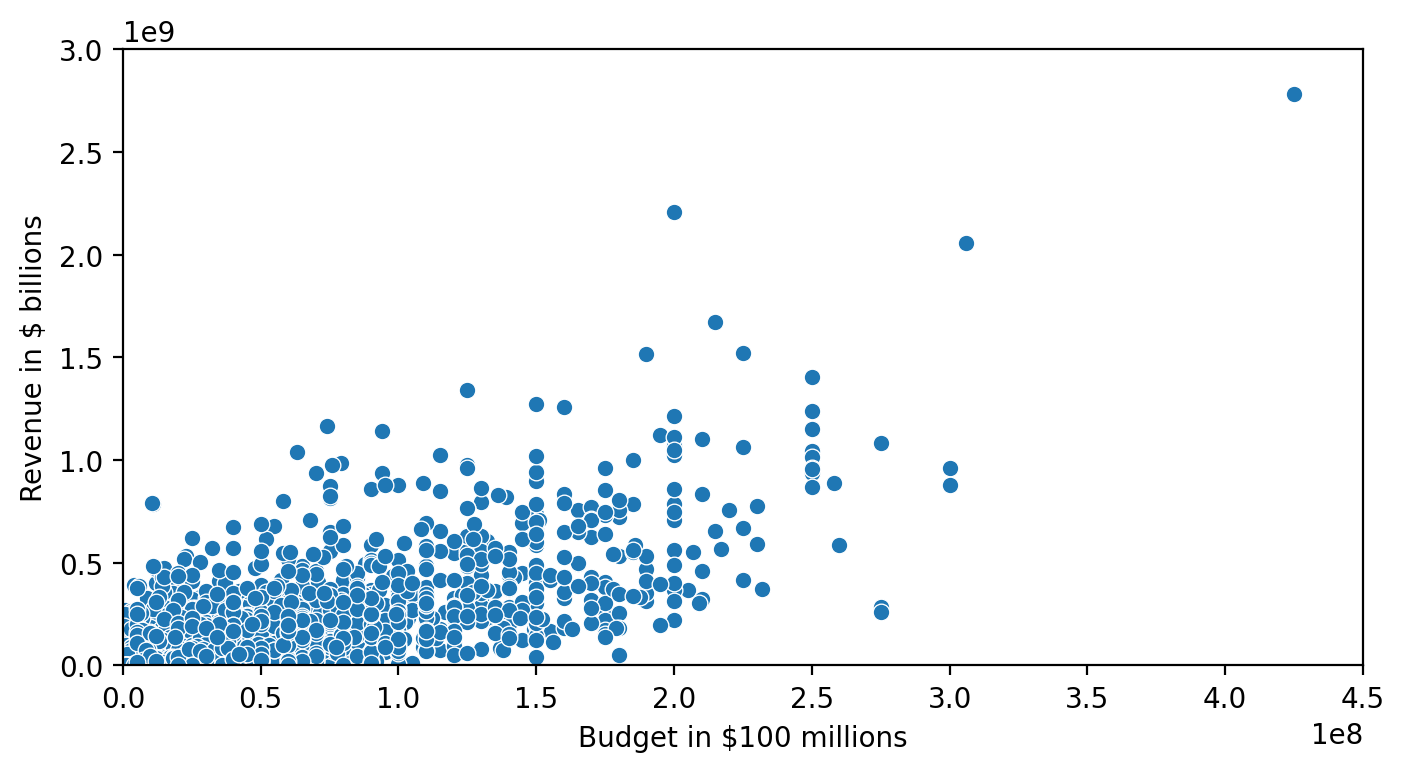

In [34]:
#create a scatterplot with seaborn
#with seaborn is very easy to create bubble chart

plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data = data_clean,
                x= 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

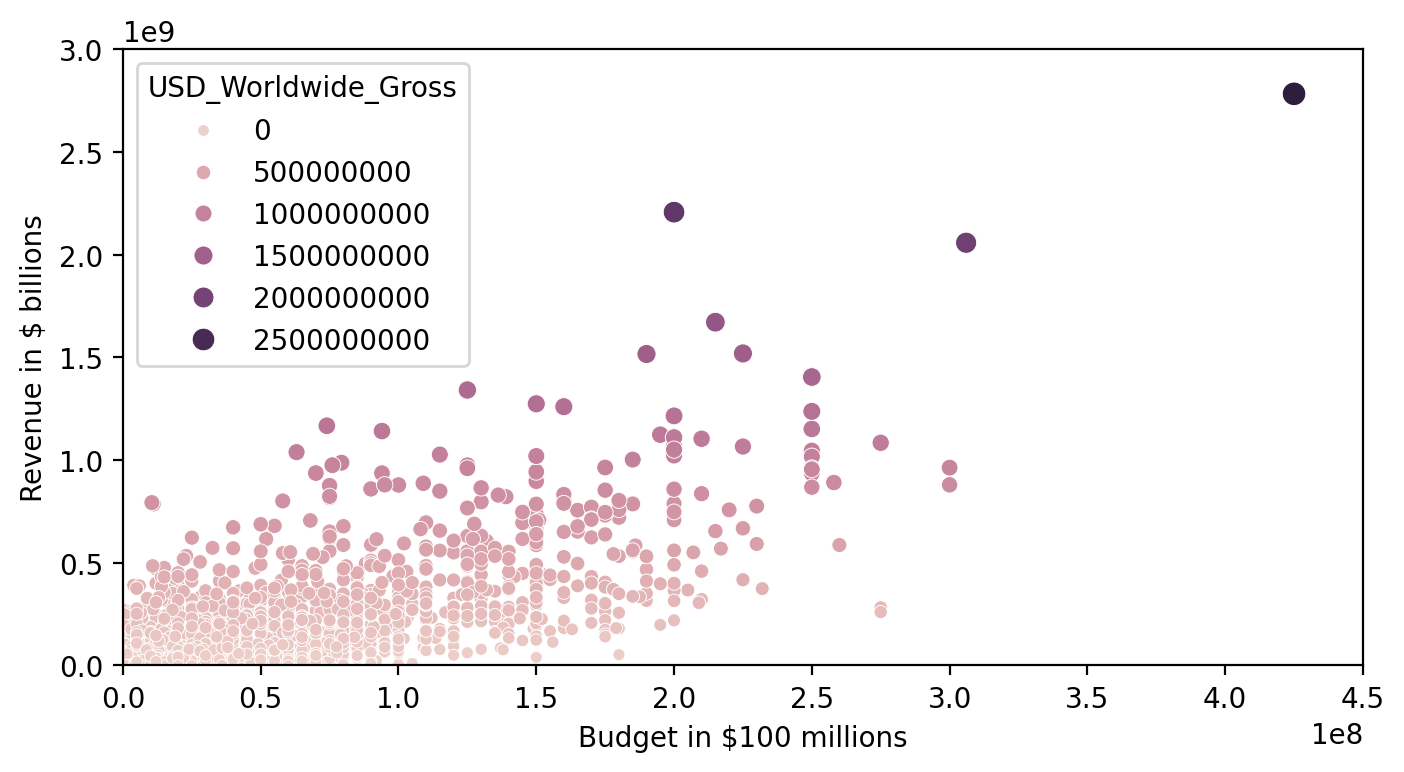

In [35]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data = data_clean,
                x= 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross',
                     hue = 'USD_Worldwide_Gross', #colour
                     size = 'USD_Worldwide_Gross',) #dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

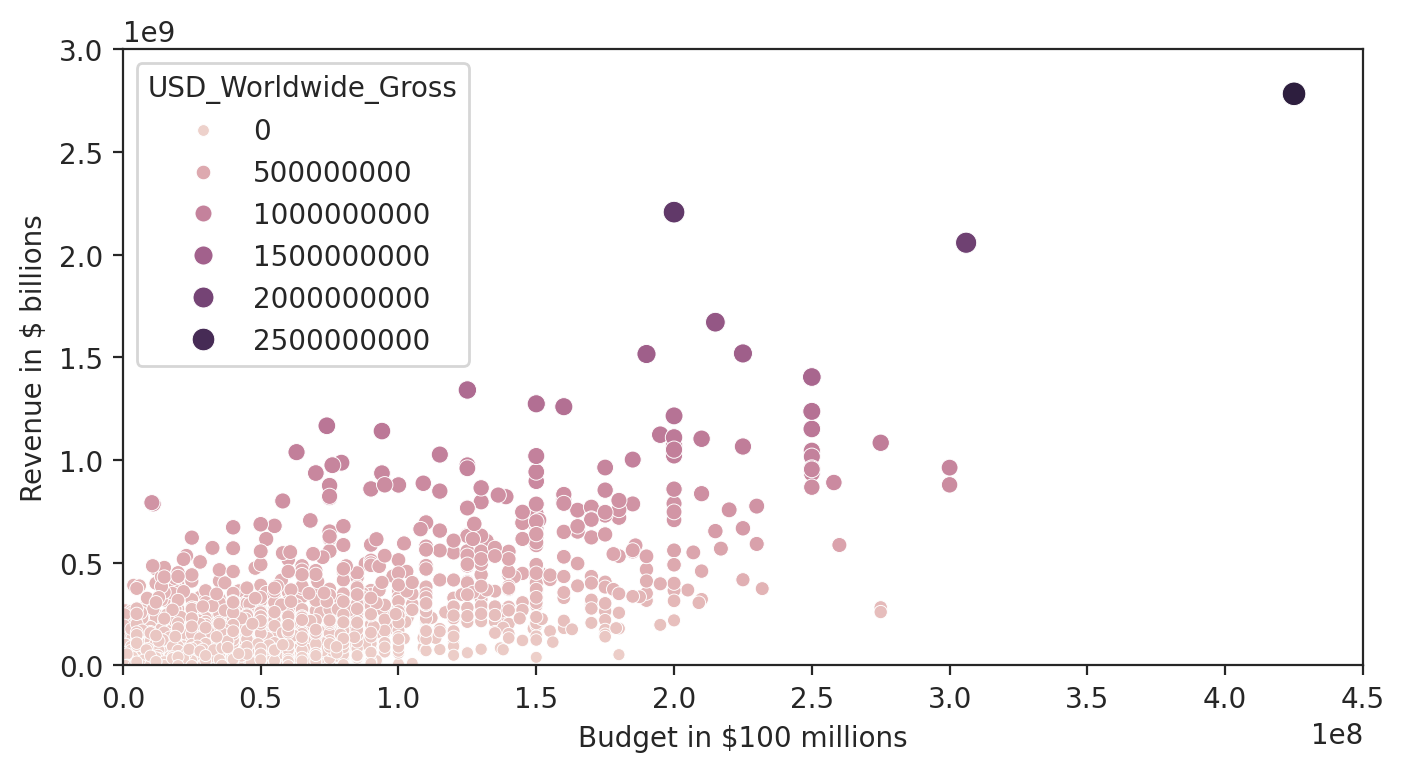

In [36]:
#using the Python's with keyword

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('ticks'):
  ax = sns.scatterplot(data = data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')





[(0.0, 450000000.0),
 (-19876.0, 17531.0),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Budget in $100 millions')]

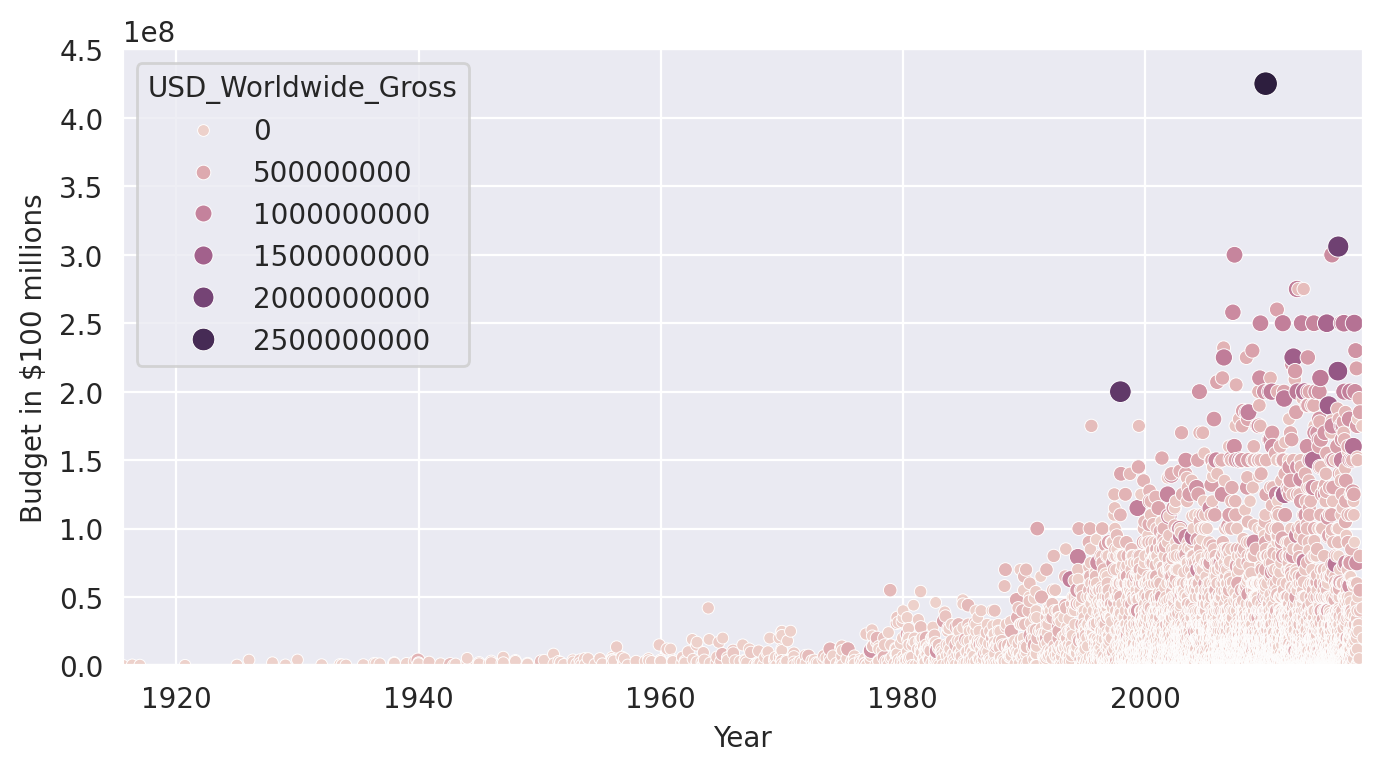

In [37]:
#3 dimensions, adding the release date

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data = data_clean,
                       x = 'Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross', #bubble chart based on....
                       size='USD_Worldwide_Gross') #size of bubbles...

ax.set(
        ylim=(0, 450000000),
        xlim =(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        xlabel = 'Year',
        #zlabel='Revenue in $ billions',
        ylabel='Budget in $100 millions')

In [38]:
#create a column called decade
only_year = data_clean.Release_Date.dt.year
decades = only_year//10*10
decades

data_clean['Decade'] = decades

data_clean.head()
pd.DatetimeIndex(data_clean.Decade)
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   Decade                 5384 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 273.5+ KB


In [39]:
from datetime import datetime
pd.DatetimeIndex(data_clean.Decade)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   Decade                 5384 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 273.5+ KB


In [41]:
#old film dataframe = all films before 1970
old_films = data_clean.loc[data_clean.Decade <= 1969]
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [42]:
new_films = data_clean.query('Decade >= 1970')
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [52]:
old_films.sort_values('USD_Production_Budget', ascending = False).head(1)


#f'The most expensive film made prior 1970 was: {most_exp.Movie_Title[0]}'

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

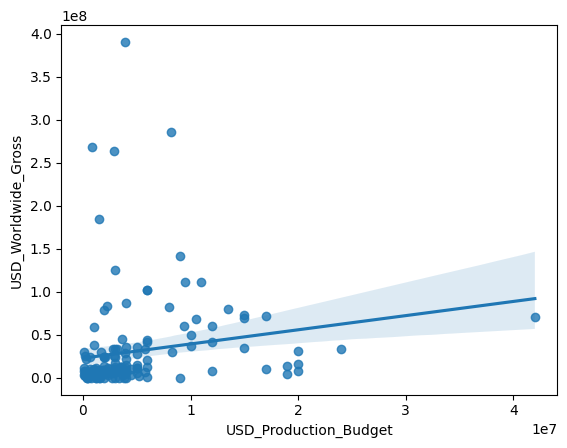

In [54]:
#seaborn and linear regression with regplot

sns.regplot(data=old_films,
            x = 'USD_Production_Budget',
            y= 'USD_Worldwide_Gross')

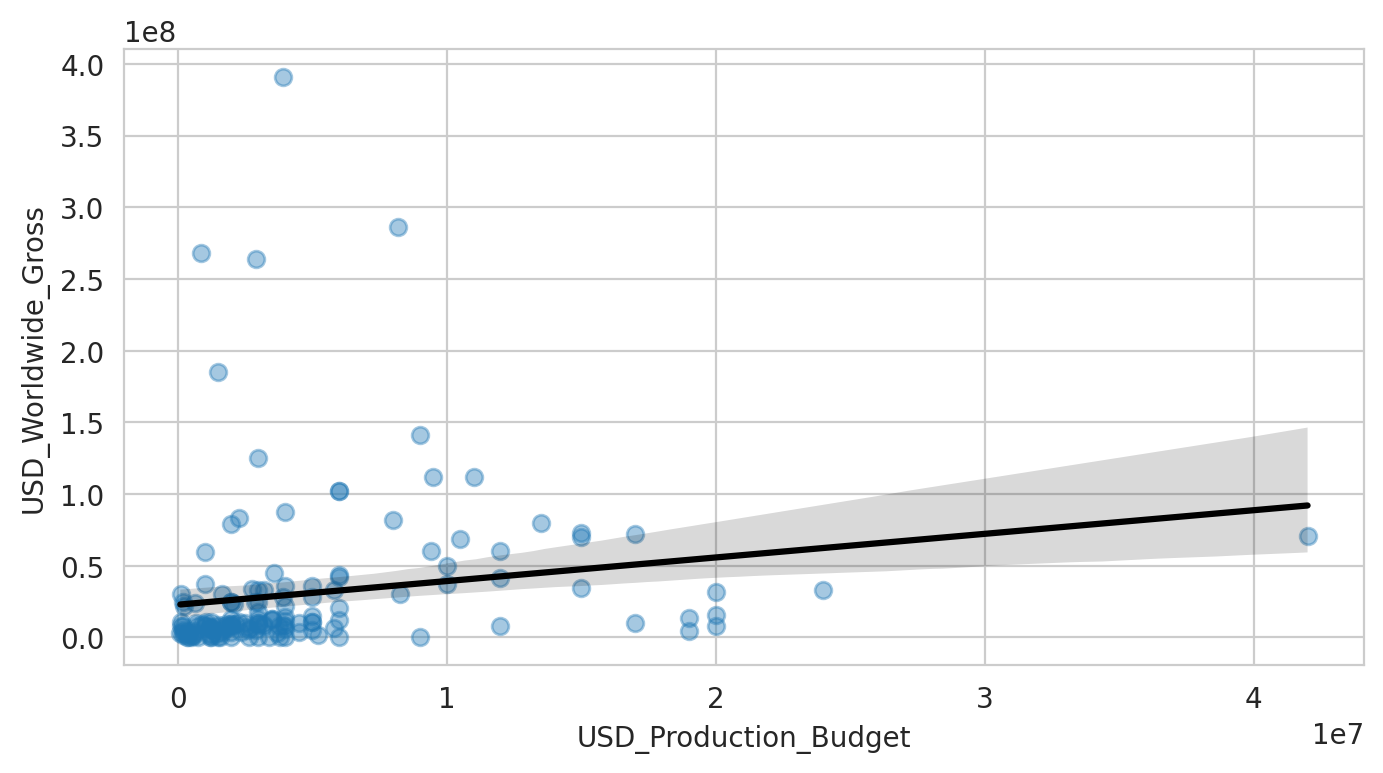

In [58]:
#styling the plot further

plt.figure(figsize = (8,4), dpi = 200)


with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
              x = 'USD_Production_Budget',
              y= 'USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4},
              line_kws={'color': 'black'})

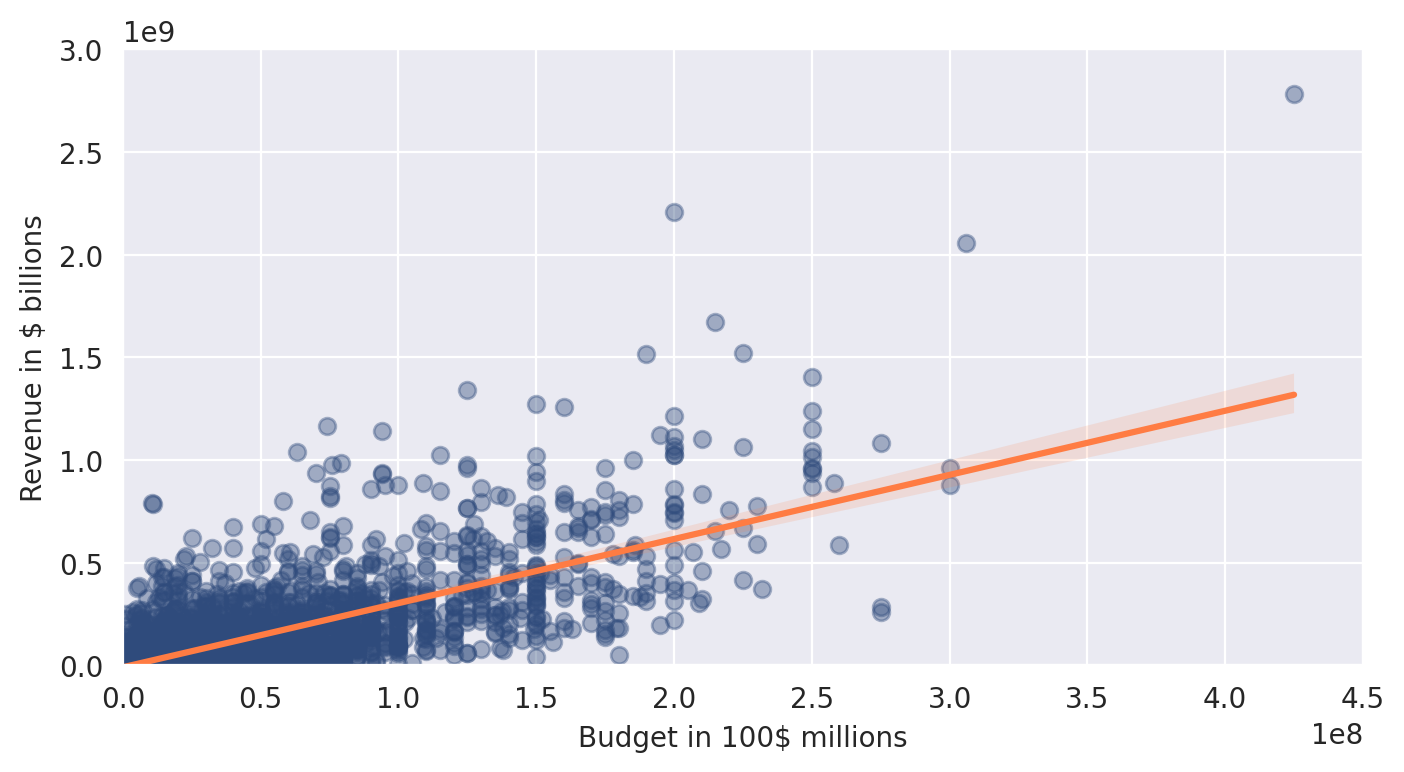

In [68]:
#relationship between prod budget and money revenue for new films
plt.figure(figsize = (8,4), dpi = 200)


with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
              x = 'USD_Production_Budget',
              y= 'USD_Worldwide_Gross',
              color = '#2f4b7c',
              scatter_kws = {'alpha': 0.4},
              line_kws={'color': '#ff7c43'})



ax.set( xlim=(0, 450000000),
        #ylim =(new_films.USD_Worldwide_Gross.min(), new_films.USD_Worldwide_Gross.max()),
        ylim = (0, 3000000000),

        ylabel='Revenue in $ billions',
        xlabel='Budget in 100$ millions')

plt.show()

In [71]:
regression = LinearRegression()
#let's specify our features or capital x
X = pd.DataFrame(new_films, columns = ['USD_Production_Budget'])

#Response Variable

y = pd.DataFrame(new_films, columns = ['USD_Worldwide_Gross'])

#Find the best-fit line
regression.fit(X, y)

#Theta zer0
print(regression.intercept_)

#Theta one
regression.coef_



[-8650768.00661027]


array([[3.12259592]])

In [72]:
#R-squared, goodness of fit
regression.score(X, y)

0.5577032617720403

In [75]:
#linear regression for old films
X = pd.DataFrame(old_films, columns = ['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns = ['USD_Worldwide_Gross'])

regression.fit(X, y)
print(regression.intercept_
      )
print(regression.coef_)
regression.score(X, y)


[22821538.63508039]
[[1.64771314]]


0.02937258620576877

In [77]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')


The estimated revenue for a $350 film is around $600000000.0.
